# 1- Importing Libraries and data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# !pip install plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
import seaborn as sb
import sklearn
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('data_orders_2017.csv')
data

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,10235,29995,4,0.00,5,10,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,10236,29996,1,0.00,7,21,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,10237,29997,54,0.00,4,17,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0
29998,10237,29998,10,0.00,5,10,0.00,0.00,100.00,0.00,0.00,0.00,0.0,0.0


In [4]:
data.shape

(30000, 14)

In [5]:
data.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
#nombre des valeurs manquantes dans les differentes colonnes
missing_values_count = data.isnull().sum()
print('le nombre des valeurs manquantes dans les differentes colonnes est:',missing_values_count[0:14])

le nombre des valeurs manquantes dans les differentes colonnes est: customer       0
order          0
total_items    0
discount%      0
weekday        0
hour           0
Food%          0
Fresh%         0
Drinks%        0
Home%          0
Beauty%        0
Health%        0
Baby%          0
Pets%          0
dtype: int64


In [7]:
#Affichage des types pour les differentes colonnes  
data.dtypes

customer         int64
order            int64
total_items      int64
discount%      float64
weekday          int64
hour             int64
Food%          float64
Fresh%         float64
Drinks%        float64
Home%          float64
Beauty%        float64
Health%        float64
Baby%          float64
Pets%          float64
dtype: object

In [8]:
data.info() # there are no missing values as all the columns has 30000 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     30000 non-null  int64  
 1   order        30000 non-null  int64  
 2   total_items  30000 non-null  int64  
 3   discount%    30000 non-null  float64
 4   weekday      30000 non-null  int64  
 5   hour         30000 non-null  int64  
 6   Food%        30000 non-null  float64
 7   Fresh%       30000 non-null  float64
 8   Drinks%      30000 non-null  float64
 9   Home%        30000 non-null  float64
 10  Beauty%      30000 non-null  float64
 11  Health%      30000 non-null  float64
 12  Baby%        30000 non-null  float64
 13  Pets%        30000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.2 MB


In [9]:
no_orders = data['customer'].value_counts()
no_orders

6560    52
7688    40
7776    37
657     36
4713    31
        ..
2823     1
8978     1
6933     1
7935     1
2039     1
Name: customer, Length: 10239, dtype: int64

In [10]:
for i in range(data.shape[0]):
    data.loc[i, 'number_orders'] = no_orders[data.loc[i, 'customer']]

In [11]:
# Add product category percentages as a check
data['Total%'] = data['Food%'] + data['Fresh%'] + data['Drinks%'] + data['Home%'] + data['Beauty%'] + data['Health%'] + data['Baby%'] + data['Pets%']
data.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,Total%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087,6.327067,99.841636
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390,5.970311,1.886816
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.220000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,100.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000,4.000000,100.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000,8.000000,100.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.000000,107.220000


In [12]:
df = data.drop_duplicates('customer')
df = df.set_index('customer')

In [13]:
df.drop(['weekday', 'hour'], inplace = True, axis = 1 )
df = data[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%','Total%','number_orders','customer']].groupby('customer').mean()



#### When we add a column summing all the product categories, the summary of the numeric data raises two issues:
- We can see that there are some samples in the dataset that do not have total=100%.
- There are negative discounts and discounts of 100%

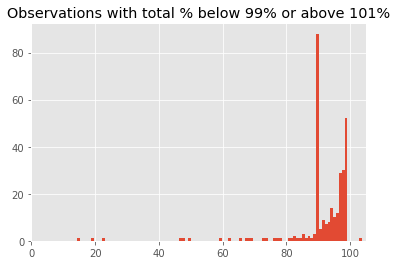

There are 298 potential outliers in the dataset of 10239 samples


In [14]:
# Examine outliers
df_check = df[(df['Total%']<99.0) | (df['Total%']>101)]
plt.hist(df_check['Total%'], bins=100)
plt.xlim(0, 105)
plt.title("Observations with total % below 99% or above 101%")
plt.show()
msg = "There are %d potential outliers in the dataset of %d samples" % (len(df_check), len(df))
print(msg)

In [15]:
#Remove records that may have errors in the product category percentages
df = df[(df['Total%']>=99.0) & (df['Total%']<=101)]

In [16]:
df = df.drop('Total%', axis = 1)

# 2- Data Exploration

### Visualize the distribution of variables

In [17]:
plt.style.use('fivethirtyeight')

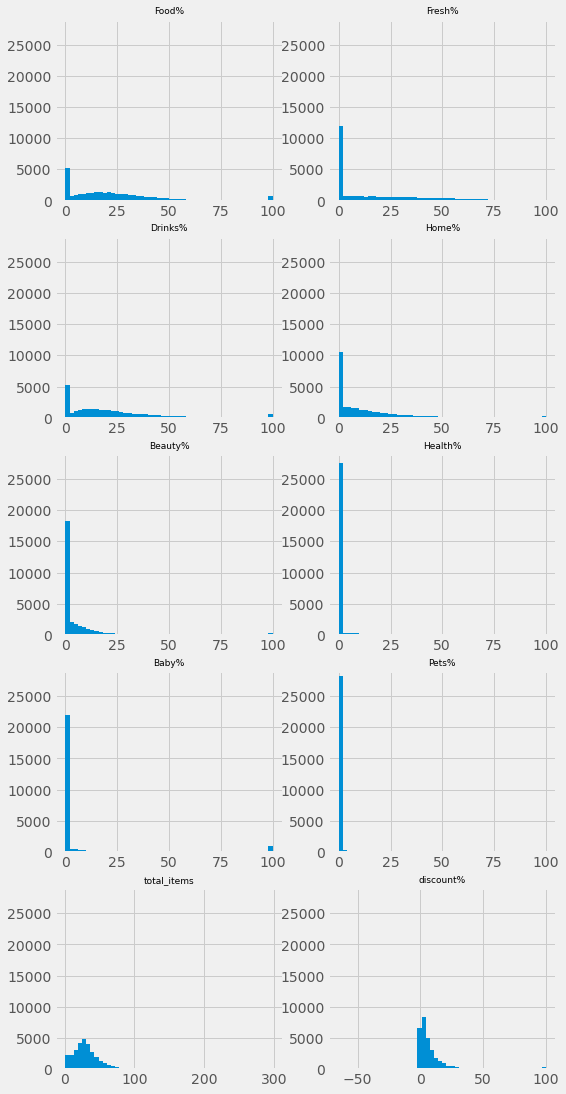

In [18]:
# Review distributions of potential predictor variables
prod = data[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%',
            'total_items', 'discount%']]

fig = plt.figure()

num=1
for column in prod:
    # Find the right spot on the plot
    ax = plt.subplot(5, 2, num)
    fig.set_size_inches(8, 18, forward=True)
    
    plot_var = data[column]
    plt.hist(plot_var, bins=50)
    title = column #+ "(log): " + v_normal
    plt.title(title, fontsize=9)
    ax.set_ylim(0, 29000)
   
    num+=1
      
plt.show()     

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



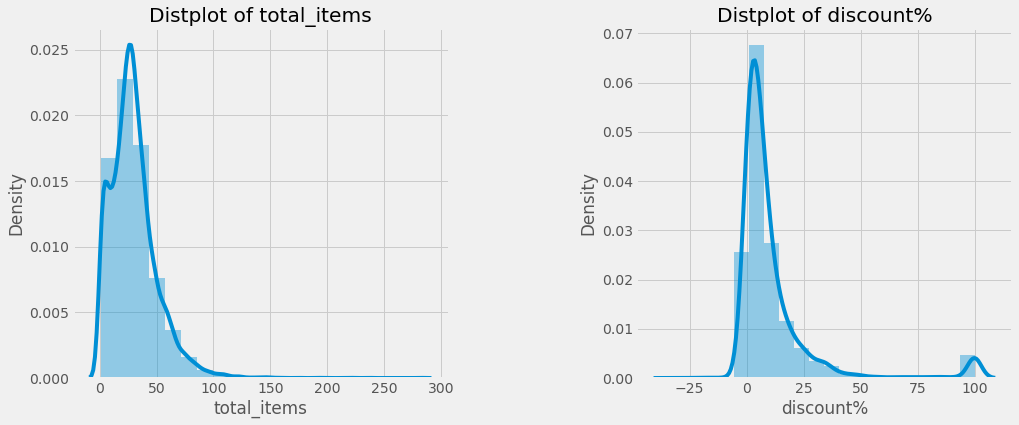

In [19]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['total_items', 'discount%']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



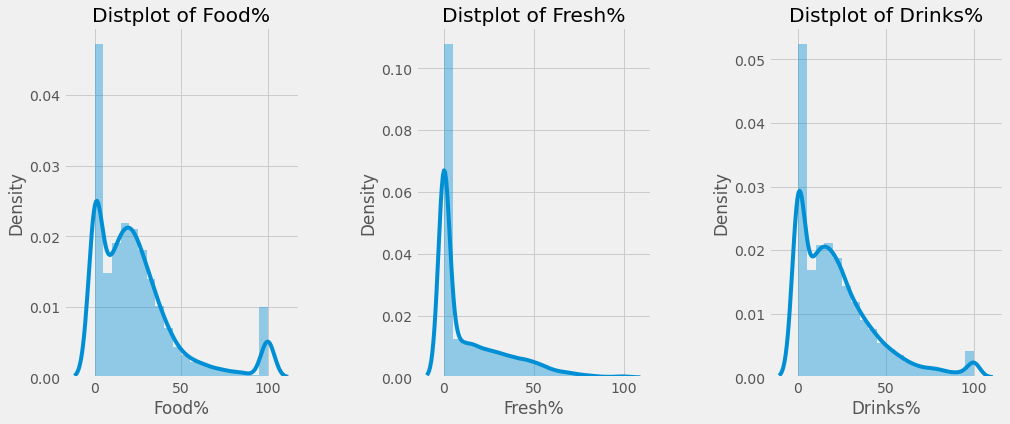

In [20]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Food%', 'Fresh%', 'Drinks%']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



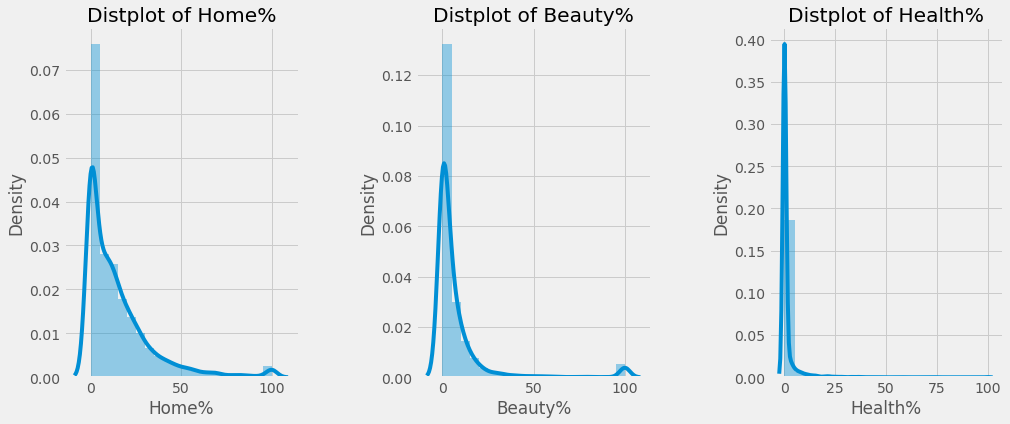

In [21]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Home%', 'Beauty%', 'Health%']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ecopress\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



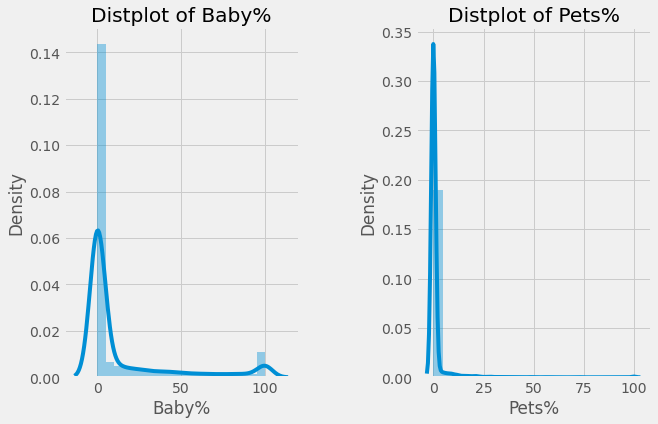

In [22]:

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Baby%','Pets%']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

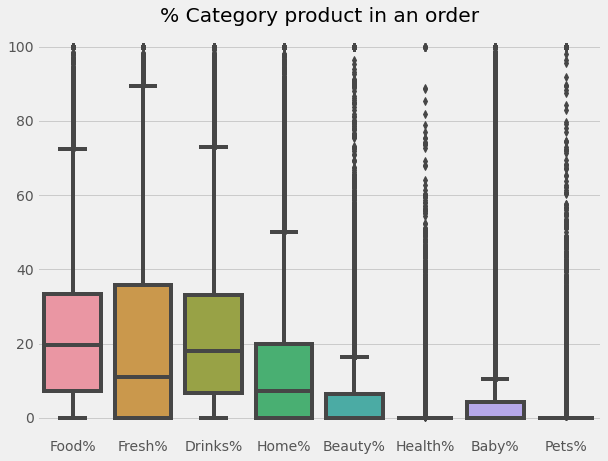

In [23]:
plt.figure(figsize=(9,7))
plt.title('% Category product in an order')
ax = sns.boxplot(data=data[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%','Pets%']])

In [24]:
a = data.groupby(['weekday', 'hour']).size().reset_index(name = 'order_count')
b = data.groupby(['weekday', 'hour'])[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%','Pets%']].agg('mean').reset_index()
total_order = a.join(b.set_index(['weekday', 'hour']), on=['weekday', 'hour'])
total_order

,weekday,hour,order_count,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,1,0,222,20.840766,18.540360,22.365405,14.459009,4.712342,1.888514,15.818153,1.080495
1,1,1,68,20.128676,24.545735,21.633824,13.836471,7.597647,1.420441,8.811029,1.915735
2,1,2,24,21.795000,27.977500,22.639583,13.099583,5.259583,0.000000,8.119167,1.108333
3,1,3,14,17.764286,20.123571,34.697857,10.347857,8.585000,0.562857,5.669286,1.624286
4,1,4,10,24.599000,19.645000,22.654000,19.891000,5.089000,1.473000,5.537000,1.112000
...,...,...,...,...,...,...,...,...,...,...,...
163,7,19,443,23.553070,22.581422,22.886005,12.633883,5.083702,0.936659,11.452686,0.745801
164,7,20,510,22.341235,23.464745,22.601549,13.775000,5.752490,0.753569,10.171216,0.856412
165,7,21,579,22.500449,24.092746,20.689758,13.903040,5.980691,0.865579,10.640829,1.249741
166,7,22,629,22.012114,21.999587,20.121335,14.415914,6.097695,1.178824,13.394547,0.727615


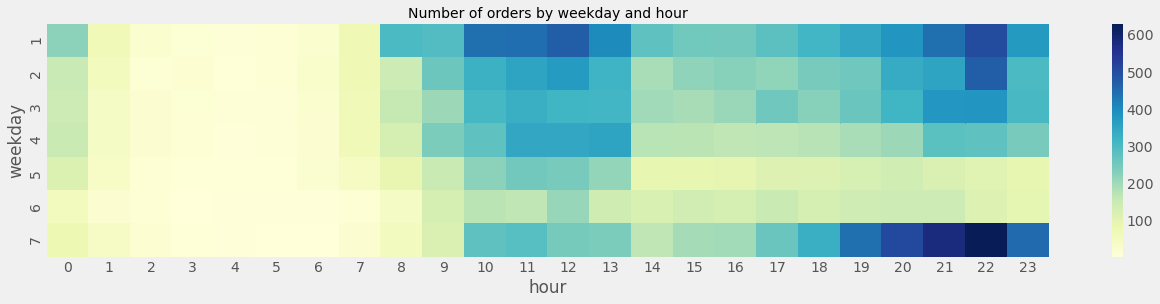

In [25]:
map = total_order.pivot('weekday', 'hour', 'order_count')

plt.figure(figsize=(20,4))
sns.heatmap(map, cmap="YlGnBu")
plt.title("Number of orders by weekday and hour", fontsize = 14)
plt.show()

In [26]:
total_order['day_hour'] = total_order['weekday'].apply(str) + '_' + total_order['hour'].apply(str)
total_order

,weekday,hour,order_count,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,day_hour
0,1,0,222,20.840766,18.540360,22.365405,14.459009,4.712342,1.888514,15.818153,1.080495,1_0
1,1,1,68,20.128676,24.545735,21.633824,13.836471,7.597647,1.420441,8.811029,1.915735,1_1
2,1,2,24,21.795000,27.977500,22.639583,13.099583,5.259583,0.000000,8.119167,1.108333,1_2
3,1,3,14,17.764286,20.123571,34.697857,10.347857,8.585000,0.562857,5.669286,1.624286,1_3
4,1,4,10,24.599000,19.645000,22.654000,19.891000,5.089000,1.473000,5.537000,1.112000,1_4
...,...,...,...,...,...,...,...,...,...,...,...,...
163,7,19,443,23.553070,22.581422,22.886005,12.633883,5.083702,0.936659,11.452686,0.745801,7_19
164,7,20,510,22.341235,23.464745,22.601549,13.775000,5.752490,0.753569,10.171216,0.856412,7_20
165,7,21,579,22.500449,24.092746,20.689758,13.903040,5.980691,0.865579,10.640829,1.249741,7_21
166,7,22,629,22.012114,21.999587,20.121335,14.415914,6.097695,1.178824,13.394547,0.727615,7_22


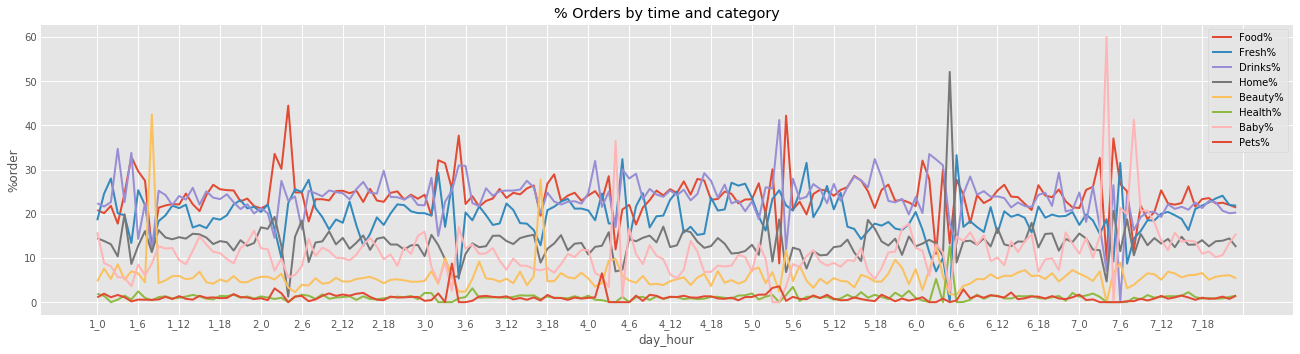

In [39]:
plt.figure(figsize=(20,5))
cm = plt.get_cmap('gist_rainbow')
cat_col = total_order[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%','Pets%']]
plt.plot(total_order['day_hour'], cat_col, linewidth=2.0)
plt.title('% Orders by time and category')
plt.xlabel('day_hour')
plt.ylabel('%order')
plt.legend(['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%','Pets%'])
plt.xticks(np.arange(0, len(b) + 1, 6))
plt.show()

### Variance between variables 

In [27]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [28]:
dependant_variable_detector(df)

Using total_items as dependent variable R2 score is :0.265900051246568
Using discount% as dependent variable R2 score is :0.30711550367850926
Using Food% as dependent variable R2 score is :0.9999962969838806
Using Fresh% as dependent variable R2 score is :0.9999942774332854
Using Drinks% as dependent variable R2 score is :0.9999955771027098
Using Home% as dependent variable R2 score is :0.9999936443988082
Using Beauty% as dependent variable R2 score is :0.9999930179781317
Using Health% as dependent variable R2 score is :0.9999242709496098
Using Baby% as dependent variable R2 score is :0.9999972722416157
Using Pets% as dependent variable R2 score is :0.9999525278721869
Using number_orders as dependent variable R2 score is :0.11670771289757886


In [29]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(20,20))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.title('matrice de correlation')
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

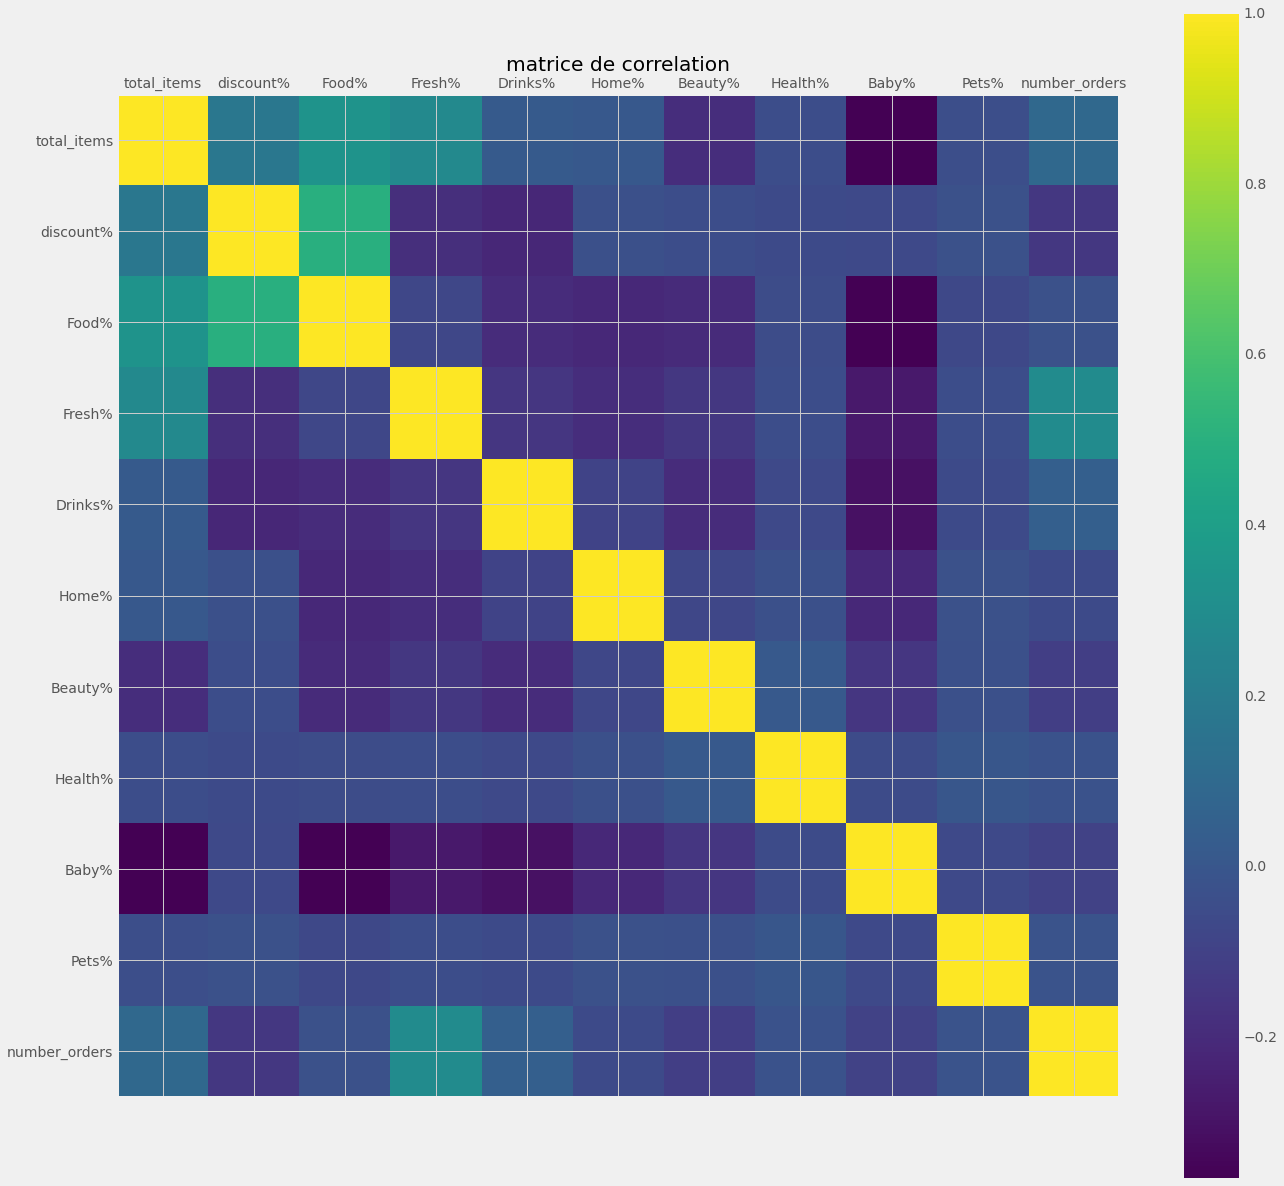

In [30]:
plot_corr_matrix(df)

# 3- Segmenation of customers using clustering method.
-  Give the characteristics of each cluster.
-  Justify the performance of your algorithm with a metric.
-  Interpret your result. 

In [31]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 1: 11].values
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

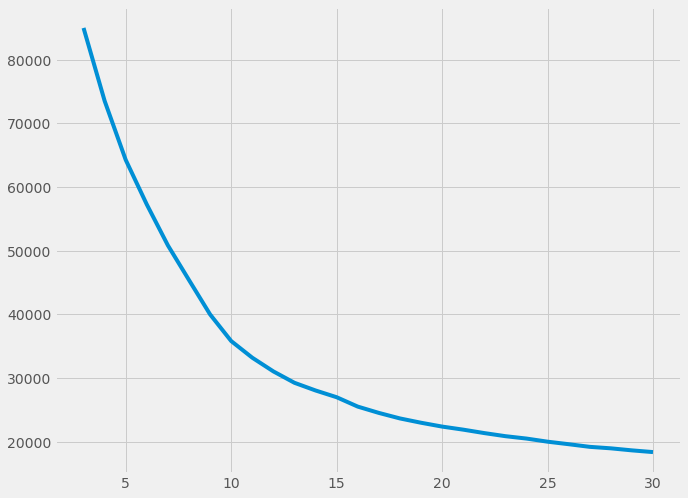

In [33]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

In [35]:
#If we zoom out this curve then you will see that last elbow comes at k=10

##Finally we got that k=10

#Model Build
kmeansmodel = KMeans(n_clusters= 10, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeansmodel.fit(X)
df['label'] = kmeansmodel.predict(X)

In [36]:
# we use PCA 
pca = PCA(n_components=2)
pca = pca.fit_transform(X)
pca

array([[ 1.26290065,  1.49459455],
       [ 1.41753006,  3.30213463],
       [ 0.07922017,  0.55056416],
       ...,
       [-2.44212086, -1.05494387],
       [-0.48779122,  1.2743451 ],
       [-2.84853404, -1.11506852]])

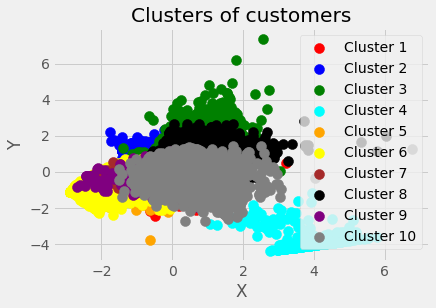

In [37]:
#Visualizing all the clusters 

plt.scatter(pca[y_kmeans == 0, 0], pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca[y_kmeans == 1, 0], pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca[y_kmeans == 2, 0], pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca[y_kmeans == 3, 0], pca[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(pca[y_kmeans == 4, 0], pca[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(pca[y_kmeans == 5, 0], pca[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(pca[y_kmeans == 6, 0], pca[y_kmeans == 6, 1], s = 100, c = 'brown', label = 'Cluster 7')
plt.scatter(pca[y_kmeans == 7, 0], pca[y_kmeans == 7, 1], s = 100, c = 'black', label = 'Cluster 8')
plt.scatter(pca[y_kmeans == 8, 0], pca[y_kmeans == 8, 1], s = 100, c = 'purple', label = 'Cluster 9')
plt.scatter(pca[y_kmeans == 9, 0], pca[y_kmeans == 9, 1], s = 100, c = 'grey', label = 'Cluster 10')


# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Class 0 : home_products

In [38]:
df[df['label']==0].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0
mean,22.990804,14.490362,10.759353,2.563763,13.447311,59.193060,7.450861,0.755139,5.056982,0.773580,1.616099,0.0
std,14.034397,11.684360,11.288942,6.340578,13.514997,20.944232,10.784634,2.800960,11.598651,3.757359,1.064641,0.0
min,1.000000,-2.810000,0.000000,0.000000,0.000000,28.050000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,14.000000,5.505000,0.000000,0.000000,0.000000,43.037500,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,21.500000,12.718000,8.220000,0.000000,10.220000,52.830000,2.755000,0.000000,0.000000,0.000000,1.000000,0.0
75%,29.000000,21.245000,17.640000,0.000000,23.350000,70.150000,11.180000,0.000000,0.000000,0.000000,2.000000,0.0
max,174.000000,92.100000,57.030000,44.830000,55.540000,100.000000,55.910000,20.300000,55.470000,36.370000,9.000000,0.0


In [39]:
df[df['label']==0].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
customer,,,,,,,,,,,,
10,24.500000,11.435000,7.150000,0.00,0.000000,38.310000,51.450000,3.085000,0.0,0.00,2.0,0
15,25.000000,10.980000,0.000000,12.29,25.540000,51.250000,6.730000,4.190000,0.0,0.00,1.0,0
26,25.000000,0.000000,6.880000,0.00,24.650000,43.580000,3.700000,0.000000,0.0,21.19,1.0,0
28,8.500000,15.345000,30.050000,0.00,8.735000,61.215000,0.000000,0.000000,0.0,0.00,2.0,0
37,22.333333,13.663333,8.296667,0.00,0.000000,45.283333,40.943333,5.476667,0.0,0.00,3.0,0
43,25.666667,6.666667,0.000000,0.00,25.176667,74.150000,0.673333,0.000000,0.0,0.00,3.0,0
46,26.000000,23.840000,0.000000,13.08,27.600000,35.930000,14.910000,8.480000,0.0,0.00,1.0,0
49,5.000000,0.000000,0.000000,0.00,0.000000,100.000000,0.000000,0.000000,0.0,0.00,1.0,0
52,10.000000,30.640000,0.000000,0.00,0.000000,56.100000,43.900000,0.000000,0.0,0.00,1.0,0


In [46]:
df.loc[df['label']==0, 'class'] = 'home_products'

##### Commentaires sur la classe 0 :  home_products
- Cette catégorie de personnes semble dépenser beaucoup dans la catégorie des produits pour la maison.
- Leurs percentiles de nombre de commandes ne sont pas mauvais.
- Ces personnes pourraient également contenir des mères de famille qui achètent generalement beaucoup de produits et moins de produits de beauté.

## Class 1 : drink_buyers

In [40]:
df[df['label']==1].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,22.847091,6.513005,11.979506,4.141083,66.963704,9.623211,3.115951,0.419104,3.198287,0.559202,2.419405,1.0
std,11.630102,8.166850,11.076539,7.389770,19.114482,10.635499,5.998186,1.955198,9.145021,3.168228,1.703835,0.0
min,1.000000,-31.820000,0.000000,0.000000,33.643333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,15.000000,1.680000,0.000000,0.000000,51.620625,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,22.000000,4.520000,10.192000,0.000000,61.496250,6.160000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0
75%,29.000000,8.609375,19.428750,5.729375,80.867500,16.740167,3.892500,0.000000,0.000000,0.000000,3.000000,1.0
max,84.000000,63.330000,50.065000,48.710000,100.000000,45.680000,50.000000,19.720000,54.234000,33.080000,11.000000,1.0


In [41]:
df[df['label']==1].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
customer,,,,,,,,,,,,
34,27.000000,25.950000,22.270000,0.000000,51.860000,6.150000,0.000000,19.720000,0.000,0.00,1.0,1
38,23.666667,0.336667,17.540000,9.273333,56.716667,13.460000,3.010000,0.000000,0.000,0.00,3.0,1
45,19.333333,1.810000,7.506667,3.810000,56.563333,8.976667,14.426667,8.713333,0.000,0.00,3.0,1
47,39.000000,1.090000,15.040000,18.390000,45.890000,17.330000,3.350000,0.000000,0.000,0.00,1.0,1
50,31.166667,10.475000,20.966667,16.063333,54.378333,5.233333,2.111667,1.248333,0.000,0.00,6.0,1
57,39.000000,5.650000,6.030000,4.070000,49.060000,4.930000,0.000000,0.000000,35.920,0.00,1.0,1
58,17.000000,13.750000,12.550000,0.000000,69.470000,17.990000,0.000000,0.000000,0.000,0.00,1.0,1
59,34.000000,11.390000,0.000000,0.000000,53.030000,15.700000,23.440000,7.830000,0.000,0.00,1.0,1
80,17.500000,2.990000,15.900000,3.150000,44.050000,0.000000,0.000000,0.000000,36.905,0.00,2.0,1


In [47]:
df.loc[df['label']==1, 'class'] = 'drink_buyers'

##### Commentaires sur la classe 1 :  drink_buyers
- Cette classe est très nombreuse, Il s'agit des personnes qui achètent beaucoup de boissons.
- Ils sont aussi des clients précieux de Ulabox.

## Class 2 : Loyal_customers

In [42]:
df[df['label']==2].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.0
mean,32.809677,6.158283,22.569910,32.813542,20.080751,10.988964,4.003515,1.072218,7.661729,0.785433,12.664384,2.0
std,13.522900,6.413502,10.245076,19.045108,13.168239,7.703011,3.572961,2.307021,12.081636,2.598569,4.627500,0.0
min,2.100000,-0.055217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.0
25%,24.134921,2.544339,15.605558,18.617205,11.334083,6.064562,1.541022,0.000000,0.000000,0.000000,9.750000,2.0
50%,30.896368,4.623167,21.157500,33.334833,16.981333,9.584286,3.172125,0.126845,0.724000,0.000000,11.500000,2.0
75%,39.429426,7.494479,28.365833,46.632682,25.162955,14.255654,5.179375,1.238021,11.036500,0.000000,15.000000,2.0
max,97.133333,100.000000,76.439091,98.600000,100.000000,83.474375,26.974444,24.120000,65.445000,22.751765,52.000000,2.0


In [43]:
df[df['label']==2].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
customer,,,,,,,,,,,,
1,31.150000,17.849000,17.762000,52.909000,17.761000,3.207500,2.314500,4.352000,1.695000,0.000000,20.0,2
3,27.782609,4.102174,23.825652,51.280870,8.220870,14.773478,0.000000,0.000000,1.898696,0.000000,23.0,2
4,17.103448,4.373103,24.841379,51.082414,10.291034,13.035172,0.683793,0.000000,0.065517,0.000000,29.0,2
6,40.769231,2.683846,39.315385,23.766923,19.721538,5.633077,2.188462,0.000000,6.617692,2.756923,13.0,2
8,35.250000,23.670000,24.091250,37.566250,22.392500,12.033750,3.917500,0.000000,0.000000,0.000000,8.0,2
9,17.750000,3.004167,9.296667,64.840000,14.153333,3.257500,2.439167,5.390000,0.625000,0.000000,12.0,2
12,36.222222,1.961111,26.698889,3.593333,19.321111,14.591111,1.263333,0.144444,34.386667,0.000000,9.0,2
41,41.000000,20.261818,28.030909,39.912727,13.620000,7.469091,8.094545,2.873636,0.000000,0.000000,11.0,2
48,40.863636,18.805000,22.782273,47.901364,14.397727,5.881364,3.627727,0.000000,5.411364,0.000000,22.0,2


In [48]:
df.loc[df['label']==2, 'class'] = 'Loyal_customers'

##### Commentaires sur la classe 2 :  Loyal_customers
- Ces personnes semblent dépenser leur argent dans toutes les catégories, ce qui signifie qu'ils dépendent d'ulabox pour leurs chats.
- Leur nombre de commandes est très impressionnant, ce qui signifie qu'ils sont les clients les plus précieux d'ulabox.

## Class 3 : discount_customers

In [44]:
df[df['label']==3].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.0
mean,51.309064,93.758630,97.071742,0.344884,0.880335,0.720554,0.339770,0.111617,0.402405,0.127706,1.211340,3.0
std,23.220624,13.843944,8.516706,2.158271,3.682481,3.700969,1.828936,1.134585,3.532166,1.683849,0.529907,0.0
min,2.000000,35.520000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
25%,32.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
50%,52.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,66.250000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
max,127.000000,100.000000,100.000000,24.240000,30.780000,34.410000,16.535000,15.420000,50.000000,24.080000,5.000000,3.0


In [66]:
df[df['label']==3].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label,class
customer,,,,,,,,,,,,,
100,82.25,49.9625,81.62,0.000,15.8325,1.060,0.00,0.00,1.05,0.0,4.0,3,NaN
341,6.00,42.8600,100.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.0,1.0,3,NaN
351,21.00,48.9500,76.34,15.740,3.9100,4.010,0.00,0.00,0.00,0.0,1.0,3,NaN
1370,6.00,50.0000,100.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.0,1.0,3,NaN
1441,22.00,100.0000,100.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.0,1.0,3,NaN
1472,41.00,70.3100,69.22,0.000,30.7800,0.000,0.00,0.00,0.00,0.0,1.0,3,NaN
1476,40.00,64.6000,64.60,0.000,0.0000,20.930,3.66,10.81,0.00,0.0,1.0,3,NaN
1477,27.00,100.0000,100.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.0,1.0,3,NaN
1478,39.50,73.9750,75.03,1.275,7.2450,14.625,1.83,0.00,0.00,0.0,2.0,3,NaN


In [67]:
df.loc[df['label']==3, 'class'] = 'discount_customers'

##### Commentaires sur la classe 3 : discount_customers
- Cette catégorie de personnes  achète de produits à des prix très bas.
- Leur nombre de commandes est assez faible, étant donné qu'ils sont censés avoir commandé des produits uniquement pendant la période de l'offre.

## Class 4 : Beauty_buyers

In [45]:
df[df['label']==4].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.0
mean,5.856696,9.190672,2.350509,0.271899,1.116607,2.315718,92.966924,0.638746,0.302419,0.037214,1.129032,4.0
std,7.762020,11.436423,7.238346,2.312591,4.697209,7.425663,14.713582,3.204007,2.725403,0.687202,0.503875,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.830000,0.000000,0.000000,0.000000,1.000000,4.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.000000,4.0
50%,2.000000,9.640000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.000000,4.0
75%,7.000000,9.640000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.000000,4.0
max,47.000000,100.000000,45.880000,32.030000,43.550000,41.770000,100.000000,23.120000,35.510000,12.690000,5.000000,4.0


In [50]:
df[df['label']==4].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label,class
customer,,,,,,,,,,,,,
139,1.0,9.64,0.00,0.0,0.0,0.00,100.00,0.00,0.0,0.0,1.0,4,Beauty_buyers
196,5.0,20.05,0.00,0.0,0.0,0.00,100.00,0.00,0.0,0.0,1.0,4,Beauty_buyers
248,12.0,2.45,0.00,0.0,0.0,0.00,100.00,0.00,0.0,0.0,1.0,4,Beauty_buyers
300,6.0,0.00,0.00,0.0,0.0,0.00,100.00,0.00,0.0,0.0,1.0,4,Beauty_buyers
326,10.0,5.30,11.99,0.0,0.0,0.00,88.01,0.00,0.0,0.0,1.0,4,Beauty_buyers
344,8.0,0.00,0.00,0.0,0.0,0.00,100.00,0.00,0.0,0.0,1.0,4,Beauty_buyers
382,20.0,0.00,0.00,0.0,0.0,24.41,63.43,12.17,0.0,0.0,1.0,4,Beauty_buyers
524,5.0,20.04,0.00,0.0,0.0,0.00,100.00,0.00,0.0,0.0,1.0,4,Beauty_buyers
539,17.0,32.50,0.00,0.0,0.0,39.81,60.19,0.00,0.0,0.0,1.0,4,Beauty_buyers


In [49]:
df.loc[df['label']==4, 'class'] = 'Beauty_buyers'

##### Commentaires sur la classe 4 : Beauty_buyers
- Il s'agit de la catégorie de personnes qui achètent beaucoup de produits de beauté.
- Certains semblent acheter aussi beaucoup de produits d'épicerie et de maison, ce devrait être des mères.
- Cette catégorie de personnes semble avoir passé très peu de commandes.

## Class 5 : new_parents

In [51]:
df[df['label']==5].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.0
mean,10.742359,8.932872,3.747205,1.184918,5.711962,4.900662,2.399075,0.566575,81.266706,0.219660,1.896578,5.0
std,9.299698,10.693105,6.936244,3.887873,8.895586,8.285500,5.595302,2.441110,19.638418,1.769379,1.324151,0.0
min,1.000000,-23.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.640000,0.000000,1.000000,5.0
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.797500,0.000000,1.000000,5.0
50%,8.000000,4.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.420000,0.000000,1.000000,5.0
75%,15.500000,15.224167,5.110000,0.000000,9.730000,7.460000,2.057500,0.000000,100.000000,0.000000,2.000000,5.0
max,93.000000,49.560000,52.580000,30.997500,43.716667,43.510000,50.000000,21.420000,100.000000,28.330000,11.000000,5.0


In [52]:
df[df['label']==5].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label,class
customer,,,,,,,,,,,,,
63,5.5,0.140000,0.000000,0.000,4.720000,0.000000,0.000000,0.000000,95.280000,0.000000,2.0,5,NaN
65,7.5,9.625000,6.215000,0.000,9.610000,0.000000,0.000000,0.000000,84.180000,0.000000,2.0,5,NaN
72,2.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.0,5,NaN
96,30.5,12.720000,16.640000,26.005,6.935000,0.000000,2.170000,0.000000,48.250000,0.000000,2.0,5,NaN
105,6.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.0,5,NaN
123,26.0,17.345000,5.530000,0.000,0.795000,33.985000,1.450000,0.000000,58.240000,0.000000,2.0,5,NaN
125,15.8,37.710000,10.664000,13.974,2.256000,16.390000,21.274000,0.000000,35.442000,0.000000,5.0,5,NaN
137,2.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.0,5,NaN
142,13.5,7.101667,5.378333,0.000,14.911667,20.101667,11.401667,3.431667,42.058333,2.716667,6.0,5,NaN


In [53]:
df.loc[df['label']==5, 'class'] = 'new_parents'

##### Commentaires sur la classe 5 : new_parents
- Leur nombre de commandes est également assez bon.
- Ils achètent  plus de produits pour les bébés.

## Class 6 : pets_lovers

In [54]:
df[df['label']==6].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0
mean,14.325450,8.579324,6.713525,2.623311,8.711453,9.590372,3.351295,0.343176,1.759752,66.906869,1.729730,6.0
std,9.698059,8.512719,10.889246,6.957114,13.152028,13.576847,8.540655,1.706332,6.654715,24.900069,1.126241,0.0
min,1.000000,-9.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.720000,1.000000,6.0
25%,6.250000,0.192500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.455000,1.000000,6.0
50%,12.000000,6.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.910000,1.000000,6.0
75%,20.875000,14.575000,9.942500,0.000000,13.761250,14.166250,1.229583,0.000000,0.000000,100.000000,2.000000,6.0
max,46.000000,29.410000,50.000000,34.965000,52.060000,52.370000,47.250000,10.750000,34.420000,100.000000,6.000000,6.0


In [55]:
df[df['label']==6].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label,class
customer,,,,,,,,,,,,,
129,12.00,25.0400,0.0000,0.00,0.00,0.00,0.000,0.000,0.000,100.0000,1.0,6,NaN
166,16.00,12.6400,0.0000,0.00,0.00,0.00,12.520,0.000,0.000,87.4800,1.0,6,NaN
332,18.00,0.0000,0.0000,0.00,0.00,0.00,47.250,0.000,0.000,52.7500,1.0,6,NaN
374,15.00,14.0100,0.0000,0.00,22.24,32.54,9.440,0.000,0.000,35.7800,1.0,6,NaN
529,8.00,4.7950,0.0000,0.00,0.00,12.78,0.000,0.000,31.275,55.9450,2.0,6,NaN
542,11.00,5.0150,3.2450,0.00,0.00,0.00,24.255,9.135,0.000,63.3650,2.0,6,NaN
572,18.00,14.5900,7.6900,4.82,36.39,0.00,0.000,0.000,0.000,51.0900,1.0,6,NaN
681,31.00,18.1400,0.0000,0.00,29.74,30.27,0.000,0.000,0.000,39.9900,1.0,6,NaN
831,7.00,5.4700,0.0000,0.00,0.00,3.38,0.000,0.000,34.420,62.2000,1.0,6,NaN


In [56]:
df.loc[df['label']==6, 'class'] = 'pets_lovers'

##### Commentaires sur la classe 6 : pets_lovers
- C'est la classe des amoureux des animaux, ils achètent beaucoup de produits pour animaux.
- Il s'agit plutôt d'une petite catégorie de clients, mais qui peuvent  être des clients potentiels.

## Class 7 : fresh_regulars

In [57]:
df[df['label']==7].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.0
mean,41.614202,6.039135,21.296562,46.223246,15.753315,8.611830,4.232771,0.812979,2.262319,0.802923,2.992939,7.0
std,21.599616,6.718283,10.327646,15.233595,9.861958,7.493902,5.344277,2.298961,6.460310,2.921650,2.013394,0.0
min,1.000000,0.000000,0.000000,17.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.0
25%,28.000000,2.116667,14.080000,34.645000,8.471667,2.790000,0.000000,0.000000,0.000000,0.000000,1.000000,7.0
50%,37.000000,4.087500,20.740000,43.660000,14.742000,7.210000,2.630000,0.000000,0.000000,0.000000,2.000000,7.0
75%,50.000000,7.376250,27.820000,54.130000,21.580000,12.770000,6.166667,0.000000,0.000000,0.000000,4.000000,7.0
max,236.000000,92.000000,57.225000,100.000000,49.970000,47.368333,40.940000,20.420000,48.360000,32.500000,10.000000,7.0


In [58]:
df[df['label']==7].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label,class
customer,,,,,,,,,,,,,
0,44.666667,14.110,14.070000,73.203333,4.356667,6.200000,2.176667,0.0,0.000,0.0,3.0,7,NaN
7,40.000000,0.930,23.700000,52.540000,13.930000,0.000000,9.830000,0.0,0.000,0.0,1.0,7,NaN
13,32.000000,0.000,0.000000,76.950000,0.000000,0.000000,8.280000,0.0,14.770,0.0,1.0,7,NaN
16,16.000000,14.000,0.000000,51.120000,28.300000,20.580000,0.000000,0.0,0.000,0.0,1.0,7,NaN
17,53.000000,18.100,11.650000,37.460000,12.650000,0.000000,0.000000,0.0,38.240,0.0,1.0,7,NaN
18,20.600000,17.450,19.776000,45.038000,21.022000,10.374000,3.792000,0.0,0.000,0.0,5.0,7,NaN
19,28.000000,16.960,11.696667,40.056667,35.300000,11.926667,0.000000,0.0,1.020,0.0,3.0,7,NaN
23,28.000000,0.000,6.980000,84.960000,8.060000,0.000000,0.000000,0.0,0.000,0.0,1.0,7,NaN
40,69.000000,3.160,40.140000,48.300000,7.200000,1.580000,0.000000,0.0,2.780,0.0,1.0,7,NaN


In [59]:
df.loc[df['label']==7, 'class'] = 'fresh_regulars'

##### Commentaires sur la classe 7 : fresh_regulars
- C'est la classe de personnes qui achètent beaucoup de produits frais.
- Ils semblent acheter régulièrement, leur pourcentage de commande est bon.
- Les gens achètent des produits frais comme des légumes, du lait, etc. à un vendeur en qui ils ont confiance, ulabox a gagné la confiance de ces personnes.
- Ces personnes sont des clients potentiels qui pourraient entrer dans la catégorie des clients fidèles dans un avenir proche.

## Class 8 : health_conscious

In [60]:
df[df['label']==8].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0
mean,18.947019,5.419286,17.600576,6.160499,13.582832,8.182375,10.605614,38.772924,3.520102,1.574634,1.373984,8.0
std,11.038228,9.038432,16.444395,12.019248,15.681526,10.595268,15.210968,21.299125,12.299435,5.685912,0.872141,0.0
min,1.000000,-2.520000,0.000000,0.000000,0.000000,0.000000,0.000000,19.580000,0.000000,0.000000,1.000000,8.0
25%,10.000000,0.000000,3.220000,0.000000,0.000000,0.000000,0.000000,24.305000,0.000000,0.000000,1.000000,8.0
50%,19.000000,2.520000,14.660000,0.000000,7.880000,2.960000,4.580000,31.920000,0.000000,0.000000,1.000000,8.0
75%,25.125000,6.275000,26.160000,5.402500,23.585000,15.275000,16.995000,43.520000,0.000000,0.000000,1.000000,8.0
max,61.000000,45.670000,77.690000,61.720000,54.340000,45.140000,65.470000,100.000000,71.000000,36.980000,6.000000,8.0


In [61]:
df[df['label']==8].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label,class
customer,,,,,,,,,,,,,
39,3.0,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.0,1.0,8,NaN
90,16.0,4.02,12.06,0.00,39.13,5.05,19.55,24.20,0.00,0.0,1.0,8,NaN
127,33.0,4.41,42.06,0.00,12.22,18.74,5.25,21.74,0.00,0.0,1.0,8,NaN
156,27.0,1.69,11.32,0.00,0.00,37.45,24.56,26.67,0.00,0.0,1.0,8,NaN
235,23.0,0.00,23.31,23.99,7.08,24.64,0.00,20.98,0.00,0.0,1.0,8,NaN
256,26.0,10.21,18.48,2.46,27.00,1.83,17.33,32.90,0.00,0.0,1.0,8,NaN
399,15.0,6.66,15.65,0.00,5.55,19.00,36.89,22.90,0.00,0.0,1.0,8,NaN
414,20.0,1.55,32.74,0.00,15.58,14.29,0.00,31.92,5.47,0.0,1.0,8,NaN
417,12.0,6.04,20.77,0.00,34.43,0.00,7.59,37.21,0.00,0.0,1.0,8,NaN


In [62]:
df.loc[df['label']==8, 'class'] = 'health_conscious'

##### Commentaires sur la classe 8 : health_conscious
- Ce sont des clients qui achètent beaucoup de produits de santé, ils semblent d’acheter aussi une bonne quantité de boissons, de produits d'épicerie, de produits pour la maison et de produits de beauté.
- Le fait qu'ils achètent d'autres catégories en grande quantité, ca leurs rendent aussi des clients précieux.
- leur nombre de commandes est très faible et leur population est également très faible.

## Class 9 : futur_loyal_custumors

In [63]:
df[df['label']==9].describe()

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label
count,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.0
mean,36.245123,7.812076,38.785676,8.577461,23.809007,15.285608,6.483993,1.070380,5.033688,0.951964,2.624174,9.0
std,18.434849,8.240135,22.058875,9.199001,12.878200,10.774241,8.273500,2.819324,10.567010,3.791485,1.787922,0.0
min,1.000000,-18.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.0
25%,25.000000,2.610000,23.257500,0.000000,14.853750,6.267292,0.000000,0.000000,0.000000,0.000000,1.000000,9.0
50%,32.732143,5.436250,33.801667,5.371250,24.091250,14.810000,3.912857,0.000000,0.000000,0.000000,2.000000,9.0
75%,44.762500,10.120417,48.162500,16.226250,33.266250,23.265417,9.337500,0.000000,2.511786,0.000000,4.000000,9.0
max,282.000000,60.605000,100.000000,33.360000,62.230000,46.326000,52.150000,20.480000,55.020000,31.560000,9.000000,9.0


In [64]:
df[df['label']==9].head(10)

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label,class
customer,,,,,,,,,,,,,
2,26.000000,2.970000,24.100000,22.290000,38.690000,14.920000,0.000000,0.000,0.000000,0.0,1.0,9,NaN
5,21.000000,11.760000,6.840000,0.000000,24.020000,26.870000,10.210000,0.000,32.060000,0.0,1.0,9,NaN
11,46.800000,17.498000,31.646000,5.224000,4.274000,12.878000,5.016000,3.686,36.898000,0.0,5.0,9,NaN
14,33.285714,3.360000,40.201429,18.102857,12.048571,14.247143,10.541429,0.000,4.855714,0.0,7.0,9,NaN
20,48.000000,3.940000,30.215000,13.690000,21.270000,20.725000,0.000000,7.990,6.115000,0.0,2.0,9,NaN
21,19.000000,0.787500,28.737500,0.000000,30.552500,34.200000,5.642500,0.000,0.867500,0.0,4.0,9,NaN
22,31.500000,2.102500,18.390000,20.712500,21.347500,17.497500,16.215000,3.700,2.135000,0.0,4.0,9,NaN
24,14.000000,7.490000,67.740000,0.000000,0.000000,32.260000,0.000000,0.000,0.000000,0.0,1.0,9,NaN
25,32.750000,4.897500,14.430000,24.827500,21.915000,23.435000,10.282500,5.115,0.000000,0.0,4.0,9,NaN


In [65]:
df.loc[df['label']==9, 'class'] = 'futur_loyal_custumors'

##### Commentaires sur la classe 9 : futur_loyal_custumors
- Ils sont aussi  des clients très précieux de ulabox.
- Leur nombre de commandes n'est pas assez grand que celui des clients fidèles, mais ce sont des clients potentiels qui ont une chance de devenir des clients fidèles.
- Ils achètent dans toutes les catégories et leur nombre de commandes est assez impressionnant.

In [68]:
df

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,number_orders,label,class
customer,,,,,,,,,,,,,
0,44.666667,14.110000,14.070000,73.203333,4.356667,6.200000,2.176667,0.000,0.000000,0.0,3.0,7,fresh_regulars
1,31.150000,17.849000,17.762000,52.909000,17.761000,3.207500,2.314500,4.352,1.695000,0.0,20.0,2,Loyal_customers
2,26.000000,2.970000,24.100000,22.290000,38.690000,14.920000,0.000000,0.000,0.000000,0.0,1.0,9,futur_loyal_custumors
3,27.782609,4.102174,23.825652,51.280870,8.220870,14.773478,0.000000,0.000,1.898696,0.0,23.0,2,Loyal_customers
4,17.103448,4.373103,24.841379,51.082414,10.291034,13.035172,0.683793,0.000,0.065517,0.0,29.0,2,Loyal_customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,100.000000,0.0,1.0,5,new_parents
10235,4.000000,0.000000,5.800000,0.000000,51.300000,0.000000,0.000000,0.000,0.000000,42.9,1.0,6,pets_lovers
10236,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000,0.000000,0.0,1.0,4,Beauty_buyers


In [72]:
#Statistics on classes
df.groupby('class')['number_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Beauty_buyers,341.0,1.129032,0.503875,1.0,1.00,1.0,1.0,5.0
Loyal_customers,584.0,12.664384,4.627500,7.0,9.75,11.5,15.0,52.0
discount_customers,388.0,1.211340,0.529907,1.0,1.00,1.0,1.0,5.0
drink_buyers,1278.0,2.419405,1.703835,1.0,1.00,2.0,3.0,11.0
fresh_regulars,1841.0,2.992939,2.013394,1.0,1.00,2.0,4.0,10.0
futur_loyal_custumors,3028.0,2.624174,1.787922,1.0,1.00,2.0,4.0,9.0
health_conscious,123.0,1.373984,0.872141,1.0,1.00,1.0,1.0,6.0
home_products,969.0,1.616099,1.064641,1.0,1.00,1.0,2.0,9.0
new_parents,1315.0,1.896578,1.324151,1.0,1.00,1.0,2.0,11.0


### Download the intermidate file of results

In [70]:
df.to_csv('customer_segmentation1.csv')